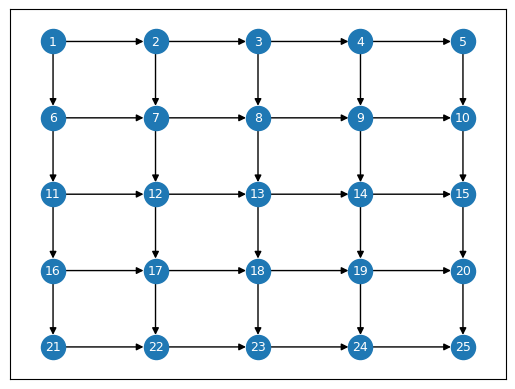

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

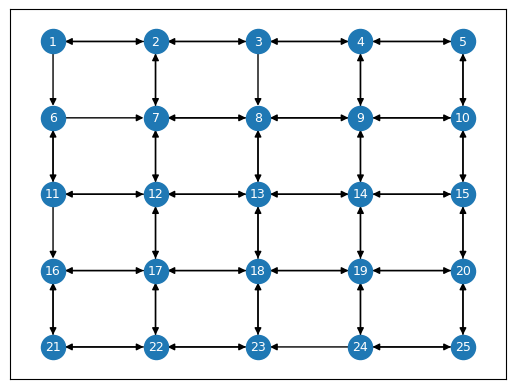

In [77]:
%run utils.py
link = 75
G,pos = generate_gridNet(5, 5, f"Network_25_{link}.tntp", draw=True, target_links=link)

In [2]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
for i in range(1):
    out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, f'stats_10000_{i+1}.pkl')

nb_entries :  0 . Number OD:  13
nb_entries :  1 . Number OD:  168
nb_entries :  2 . Number OD:  174
nb_entries :  3 . Number OD:  107
nb_entries :  4 . Number OD:  110
nb_entries :  5 . Number OD:  14
nb_entries :  6 . Number OD:  176
nb_entries :  7 . Number OD:  20
nb_entries :  8 . Number OD:  76
nb_entries :  9 . Number OD:  91
nb_entries :  10 . Number OD:  29
nb_entries :  11 . Number OD:  166
nb_entries :  12 . Number OD:  125
nb_entries :  13 . Number OD:  6
nb_entries :  14 . Number OD:  134
nb_entries :  15 . Number OD:  53
nb_entries :  16 . Number OD:  174
nb_entries :  17 . Number OD:  124
nb_entries :  18 . Number OD:  156
nb_entries :  19 . Number OD:  180
nb_entries :  20 . Number OD:  53
nb_entries :  21 . Number OD:  79
nb_entries :  22 . Number OD:  77
nb_entries :  23 . Number OD:  86
nb_entries :  24 . Number OD:  53
nb_entries :  25 . Number OD:  84
nb_entries :  26 . Number OD:  86
nb_entries :  27 . Number OD:  168
nb_entries :  28 . Number OD:  20
nb_entries :

## Fusion of files

In [2]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

185
10000
185
10000
185
10000
185
10000


In [3]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

185
40000


## Flow network : Solving

In [55]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print("Number of OD matrix, end of index: ", count2)

0
Number of OD matrix, end of index:  203
1
Number of OD matrix, end of index:  425
2
Number of OD matrix, end of index:  651
3
Number of OD matrix, end of index:  881
4
Number of OD matrix, end of index:  1093
5
Number of OD matrix, end of index:  1297
6
Number of OD matrix, end of index:  1525
7
Number of OD matrix, end of index:  1754
8
Number of OD matrix, end of index:  1967
9
Number of OD matrix, end of index:  2180
10
Number of OD matrix, end of index:  2379
11
Number of OD matrix, end of index:  2620
12
Number of OD matrix, end of index:  2860
13
Number of OD matrix, end of index:  3099
14
Number of OD matrix, end of index:  3314
15
Number of OD matrix, end of index:  3526
16
Number of OD matrix, end of index:  3728
17
Number of OD matrix, end of index:  3956
18
Number of OD matrix, end of index:  4163
19
Number of OD matrix, end of index:  4367
20
Number of OD matrix, end of index:  4585
21
Number of OD matrix, end of index:  4809
22
Number of OD matrix, end of index:  5039
23

In [16]:
import pickle
import random

num_nodes = 24
min_demand = 100
max_demand = 4000

# Create 1000 OD demand
od_demand_list = [generate_OD_demand(num_nodes, min_demand, max_demand) for i in range(1000)]
with open('od_demand_list.pkl', 'wb') as f:
    pickle.dump(od_demand_list, f)

a_file = open("od_demand_list.pkl", "rb")
output = pickle.load(a_file)
a_file.close()

for i, od_demand in enumerate(output[:2]):
    print(od_demand)

In [1]:
# from utils import *
from tqdm.notebook import tqdm
%run utils.py

# This file contains 385 OD matrix
a_file = open('SiouxFalls/od_demand_list_3000.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('SiouxFalls/SiouxFalls_net_65.tntp')
# print(links)
# print(Nodes)

# Output1: for network full 76 links
# Output2: for network 70 links
# Output3: for 65 links
# Output4: for 60 links

time = 1000

# for val in tqdm(list(stats.values())):
for OD_matrix in tqdm(stats) :
    if time < 10000:
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status ==2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Solution/SiouxFalls/Output3/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

  0%|          | 0/3000 [00:00<?, ?it/s]

1000
Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-24
model solved in: 1.2471420764923096
1001
model solved in: 1.4571068286895752
1002
model solved in: 1.494886875152588
1003
model solved in: 1.4007790088653564
1004
model solved in: 0.9951119422912598
1005
model solved in: 1.1980783939361572
1006
model solved in: 1.1085150241851807
1007
model solved in: 1.1346428394317627
1008
model solved in: 1.3153338432312012
1009
model solved in: 1.1223969459533691
1010
model solved in: 0.8202221393585205
1011
model solved in: 1.204331874847412
1012
model solved in: 1.07930588722229
1013
model solved in: 1.2554829120635986
1014
model solved in: 1.2509980201721191
1015
model solved in: 1.3195030689239502
1016
model solved in: 1.0433580875396729
1017
model solved in: 0.9568917751312256
1018
model solved in: 1.11430025100708
1019
model solved in: 1.13163423538208
1020
model solved in: 1.1226396560668945
1021
model solved in: 1.593660831451416
1022
model solve